In [2]:
import pandas as pd
import missingno as msno
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./csv/donnees.csv') # On importe notre DataSet

In [4]:
# On regarde le nombre de columns / lines du DataFrame
print(f"""
Forme du DF :
    {df.shape}
Columns :
    {df.columns}""")


Forme du DF :
    (1338, 7)
Columns :
    Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


<AxesSubplot:>

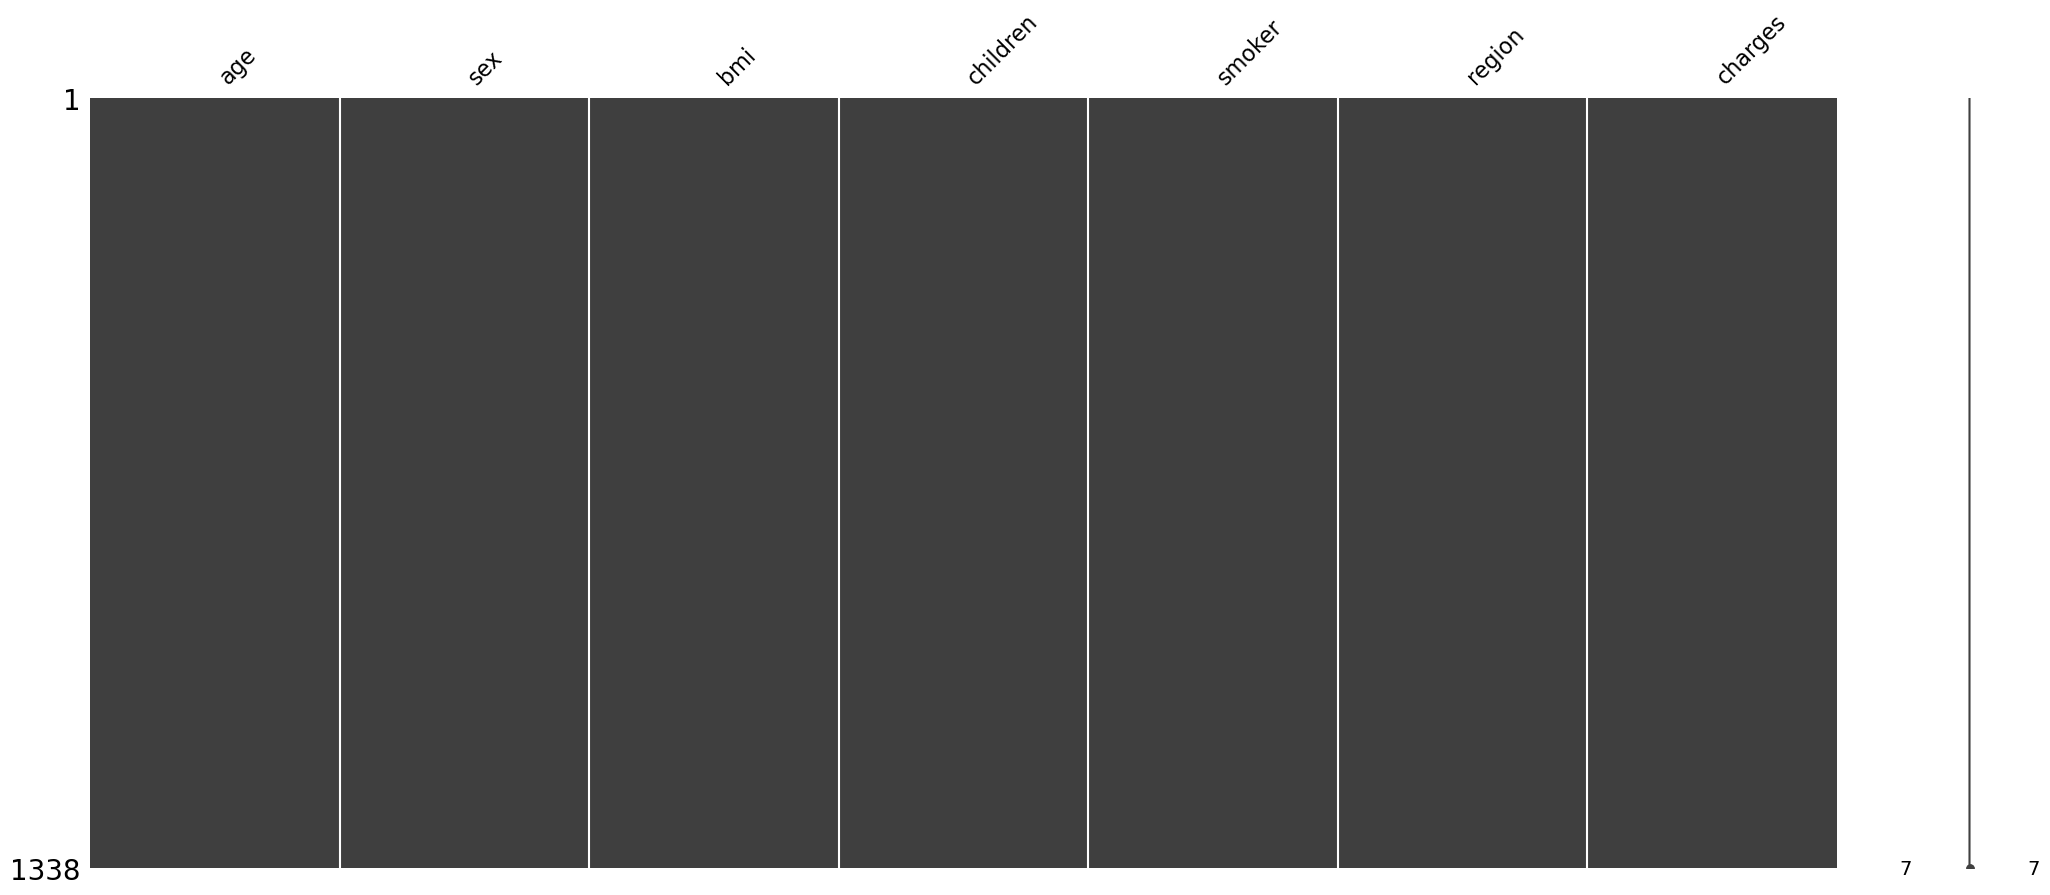

In [5]:
# Avec MissingNo on regarde si nos columns on des manquants
# Ici on peut voir que le DataFrame ne manque pas de values
msno.matrix(df)

In [8]:
df.describe() # On regarde les informations rapides du DataFrame (Moyenne, ecart type, medianne)

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


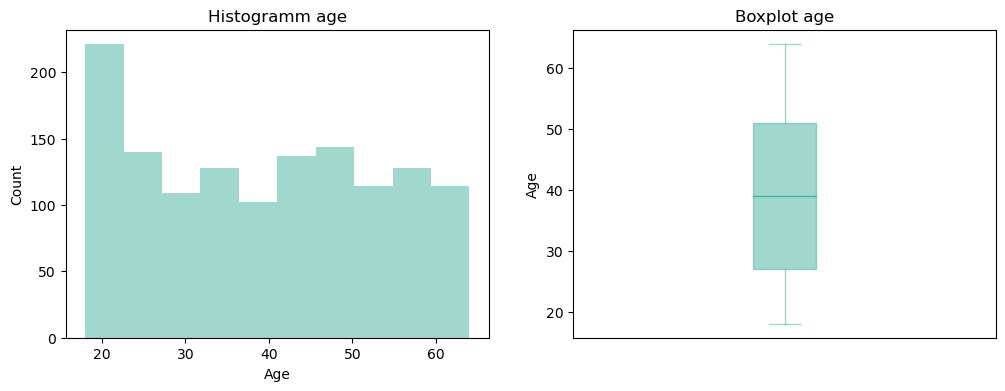

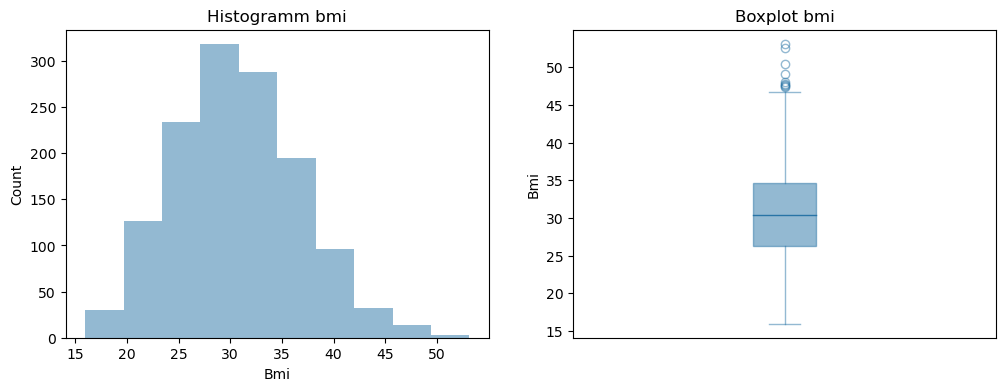

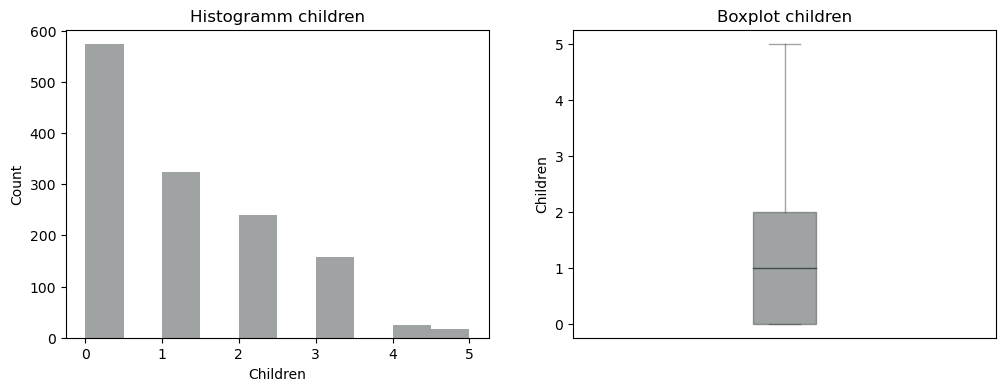

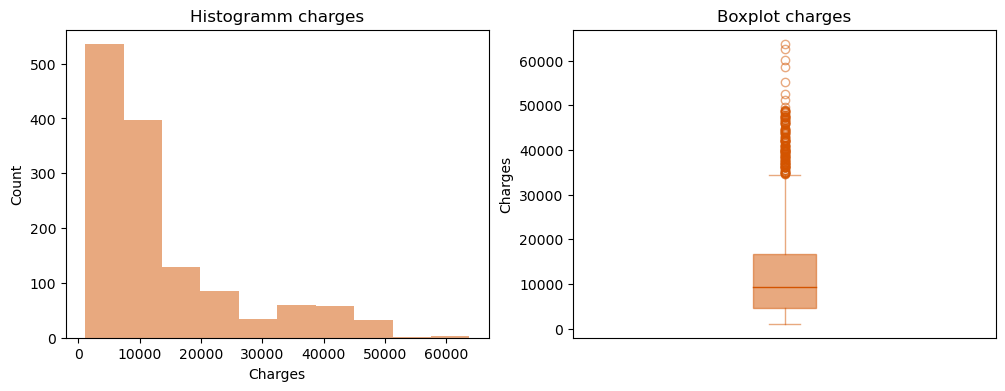

In [10]:
def numeric_distribution(df, col, c) :
    plt.figure(figsize= (12,4))

    #Tracer histogramme
    plt.subplot(1,2,1)
    plt.hist(df[col], color=c, alpha=0.5)
    plt.xlabel(col.capitalize())
    plt.ylabel ("Count")
    plt. title("Histogramm " + col)

    #Tracer boxplot
    plt.subplot(1, 2,2) 
    plt.boxplot(df[col], patch_artist=True,boxprops=dict (facecolor=c, color=c, alpha=0.5), medianprops=dict(color=c), whiskerprops=dict(color=c, alpha=0.5), capprops=dict(color=c, alpha=0.5), flierprops=dict(color=c, alpha=0.5, markeredgecolor=c))
    plt.ylabel(col.capitalize())
    plt.xticks([])
    plt.title('Boxplot ' + col)

colors= ['#45B39D','#2874A6','#424949','#D35400']
for col, c in zip(df.describe().columns, colors):
    numeric_distribution(df, col, c)
    

# Valeurs abérrantes 
Objectif : Savoir si notre dataset contient des valeurs abérrantes

### Etapes
On commence par regarder notre boxplot de la colonnes "charges", on peut voir sur celle ci prêt de 140 valeurs abérrantes, on s'est donc demandé si on devait les supprimer le problème c'est que les supprimer ça revenait à supprimer 10% de nos données.


In [11]:
df_ab = df.loc[df["charges"] > 35000]
df_ab.describe()

,age,bmi,children,charges
count,133.000000,133.000000,133.000000,133.000000
mean,41.894737,35.684474,1.233083,42435.376422
std,13.518373,4.484903,1.127395,5478.380230
min,18.000000,22.895000,0.000000,35069.374520
25%,31.000000,32.775000,0.000000,38344.566000
50%,43.000000,35.300000,1.000000,41661.602000
75%,53.000000,37.800000,2.000000,46113.511000
max,64.000000,52.580000,4.000000,63770.428010


In [12]:
# Pourcentage de données perdues si l'on supprime les valeurs que l'on considére comme abérrantes
f"{round((len(df_ab) / len(df)) * 100, 2)} %"

'9.95 %'

# Correlations
Objectif : Étudier la corrélation des variables avec la variable cible.

### Etapes :
- Transformer toutes les variables qualitatifs en variables quantitatif
- Appliquer un lambda True / False pour les fumeurs
- Afficher une heatmap pour la correlation (On retire la vmin et vmax avec le param "robust", car on a gardé les valeurs extrêmes)


<AxesSubplot:>

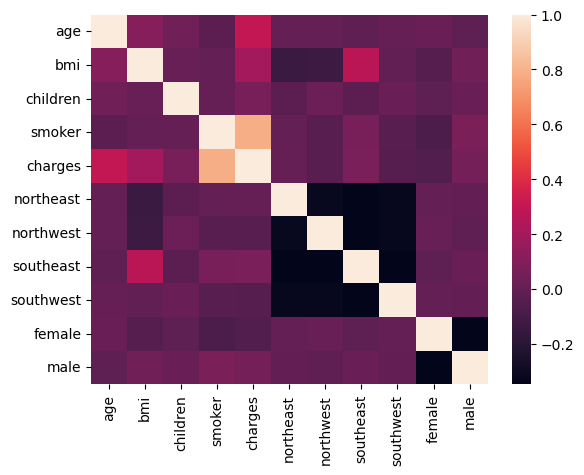

In [13]:
df_corr = df.join(pd.get_dummies(df['region'])).drop("region", axis=1)
df_corr = df_corr.join(pd.get_dummies(df_corr['sex'])).drop("sex", axis=1)
df_corr['smoker'] = df_corr['smoker'].apply(lambda x: 1 if x == "yes" else 0)
sns.heatmap(df_corr.corr(), robust=True)

In [51]:
# Corrélations un peu plus lisible
df_corr.corr()

,age,bmi,children,smoker,charges,northeast,northwest,southeast,southwest,female,male
age,1.000000,0.109344,0.041536,-0.025587,0.298308,0.001868,0.001495,-0.012311,0.009415,0.019814,-0.019814
bmi,0.109344,1.000000,0.012755,0.003746,0.198401,-0.138178,-0.136138,0.270057,-0.006211,-0.046397,0.046397
children,0.041536,0.012755,1.000000,0.007331,0.067389,-0.023202,0.026044,-0.023492,0.021538,-0.017848,0.017848
smoker,-0.025587,0.003746,0.007331,1.000000,0.787234,0.002597,-0.036321,0.068282,-0.037168,-0.076596,0.076596
charges,0.298308,0.198401,0.067389,0.787234,1.000000,0.005945,-0.038695,0.073578,-0.043637,-0.058044,0.058044
northeast,0.001868,-0.138178,-0.023202,0.002597,0.005945,1.000000,-0.319842,-0.345909,-0.320493,0.002008,-0.002008
northwest,0.001495,-0.136138,0.026044,-0.036321,-0.038695,-0.319842,1.000000,-0.345909,-0.320493,0.012482,-0.012482
southeast,-0.012311,0.270057,-0.023492,0.068282,0.073578,-0.345909,-0.345909,1.000000,-0.346614,-0.017578,0.017578
southwest,0.009415,-0.006211,0.021538,-0.037168,-0.043637,-0.320493,-0.320493,-0.346614,1.000000,0.003767,-0.003767
female,0.019814,-0.046397,-0.017848,-0.076596,-0.058044,0.002008,0.012482,-0.017578,0.003767,1.000000,-1.000000


### Graphiques

Grace à nos graphique on peut voir :
- Pas de grandes différences entre les hommes et les femmes
- La charge augmente avec l'age
- La charge augmente avec l'IMC
- La charge baisse en fonction du nb d'enfants (Manque d'informations ?)
- La charge augmente beaucoup pour les fumeurs
- La charge ne change pas beaucoup en fonction des régions

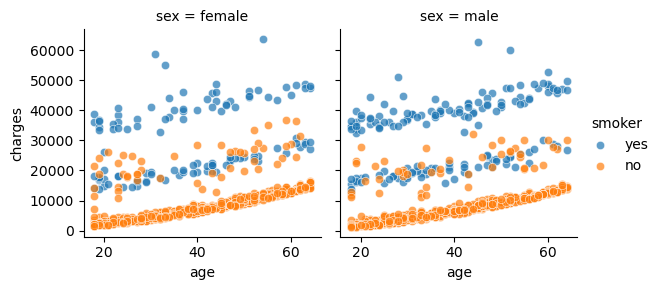

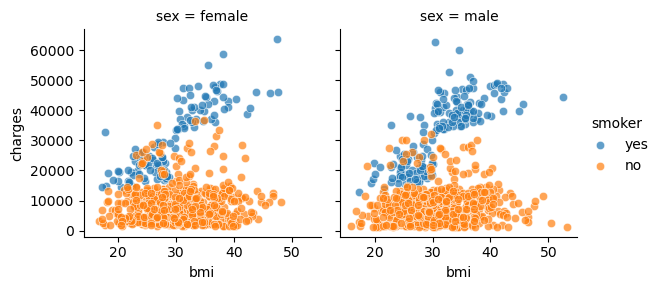

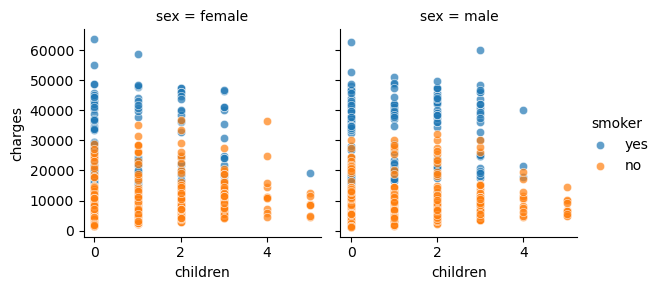

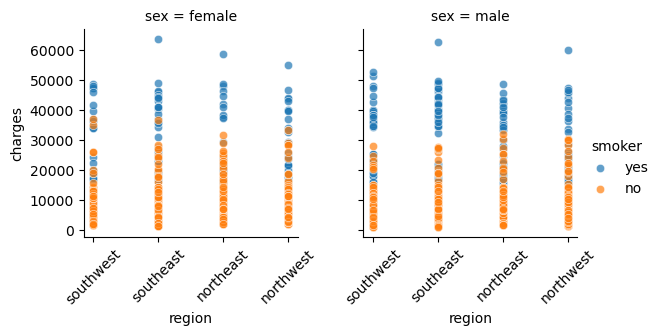

In [36]:
for col in ['age', 'bmi', 'children', 'region']:
    g = sns.FacetGrid(df, col="sex", hue="smoker")
    g.map(sns.scatterplot, col, "charges", alpha=.7)
    if col == "region":
        g.set_xticklabels(rotation=45)
    g.add_legend()


### Tests statistiques

Après nos analyses on est arrivé à l'hypothèse :
- Etre fumeur augmente la charge dans toutes les circonstences

*On va donc faire un test de statistique pour confirmer notre hypothèse (T-TEST)*

In [52]:
from scipy.stats import f_oneway
from scipy import stats

In [53]:
# FUMEUR & CHARGES
r_statistic, r_pvalue = stats.f_oneway(df[df['smoker'] == "yes"]['charges'], df[df['smoker'] == "no"]['charges'])
print(f'Statistique : {r_statistic}, \npvalue : {r_pvalue}')

# D'après nos resultats on peut dire qu'être fumeur influence les charges

Statistique : 2175.7368631272116, 
pvalue : 1.4067220949358597e-282


In [48]:
# REGION & CHARGES
r_statistic, r_pvalue = stats.f_oneway(df[df['region'] == "southwest"]['charges'], df[df['region'] == "southeast"]['charges'], df[df['region'] == "northwest"]['charges'], df[df['region'] == "northeast"]['charges'])
print(f'Statistique : {r_statistic}, \npvalue : {r_pvalue}')

# D'après nos resultats on peut dire que la region influence les charges

Statistique : 2.926139903662776, 
pvalue : 0.03276288025444947


In [49]:
# SEX & CHARGES
r_statistic, r_pvalue = stats.f_oneway(df[df['sex'] == "female"]['charges'], df[df['sex'] == "male"]['charges'])
print(f'Statistique : {r_statistic}, \npvalue : {r_pvalue}')

# D'après nos resultats on peut dire que le sex influence les charges

Statistique : 4.513038425520686, 
pvalue : 0.033820791995078286


In [54]:
# REGION & BMI
r_statistic, r_pvalue = stats.f_oneway(df[df['region'] == "southwest"]['bmi'], df[df['region'] == "southeast"]['bmi'], df[df['region'] == "northwest"]['bmi'], df[df['region'] == "northeast"]['bmi'])
print(f'Statistique : {r_statistic}, \npvalue : {r_pvalue}')

# D'après nos resultats on peut dire que le BMI est plus élevé selon les régions

Statistique : 39.48593864487439, 
pvalue : 1.9087293927440606e-24


## Conclusion

D'après nos analyses on est arrivés avec sertitude à la conclusion que :
Être **fumeur** augmente très fortement les charges, que le **sex**, la **region** et le sex augmentent légérement les charges.

Le **nombre d'enfant** ainsi que le **BMI** (IMC) sont corrélés aux charges.